In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("Scoring-Dataset-7.csv")

In [4]:
# Information about the data has been shown
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   User_ID                    300 non-null    int64 
 1   Gender                     300 non-null    object
 2   Age                        300 non-null    int64 
 3   Marital_Status             300 non-null    object
 4   Website_Activity           300 non-null    object
 5   Browsed_Electronics_12Mo   300 non-null    object
 6   Bought_Electronics_12Mo    300 non-null    object
 7   Bought_Digital_Media_18Mo  300 non-null    object
 8   Bought_Digital_Books       300 non-null    object
 9   Payment_Method             300 non-null    object
dtypes: int64(2), object(8)
memory usage: 23.6+ KB
None


In [7]:
df.shape

(300, 10)

In [8]:
df['Age'].describe()

count    300.000000
mean      46.100000
std       14.141544
min       17.000000
25%       34.000000
50%       49.000000
75%       58.000000
max       70.000000
Name: Age, dtype: float64

In [9]:
# Summarize(Age)=>numeric data
df['Age'].aggregate(['mean', 'median', 'std', 'var', 'max', 'min']) 

mean       46.100000
median     49.000000
std        14.141544
var       199.983278
max        70.000000
min        17.000000
Name: Age, dtype: float64

In [10]:
# use value_counts() => counts unique values in the 'Age'
df['Age'].value_counts() 

Age
51    15
49    13
61    12
44    10
62    10
52    10
31    10
36     9
64     9
32     8
34     8
68     8
53     8
57     8
26     7
56     7
67     7
45     7
47     7
65     6
42     6
25     6
33     6
58     6
17     6
37     6
50     5
29     5
55     5
59     5
48     5
43     5
46     4
21     4
35     4
54     4
60     4
28     4
30     4
22     3
24     3
23     3
66     3
69     3
41     2
38     2
63     2
19     2
18     1
40     1
27     1
70     1
Name: count, dtype: int64

In [11]:
# Disaply frequency in the Aga
df['Age'].mode() 

0    51
Name: Age, dtype: int64

In [12]:
#Disaply Range in the Age
range_age=df['Age'].max()-df['Age'].min() 
print(range_age)

53


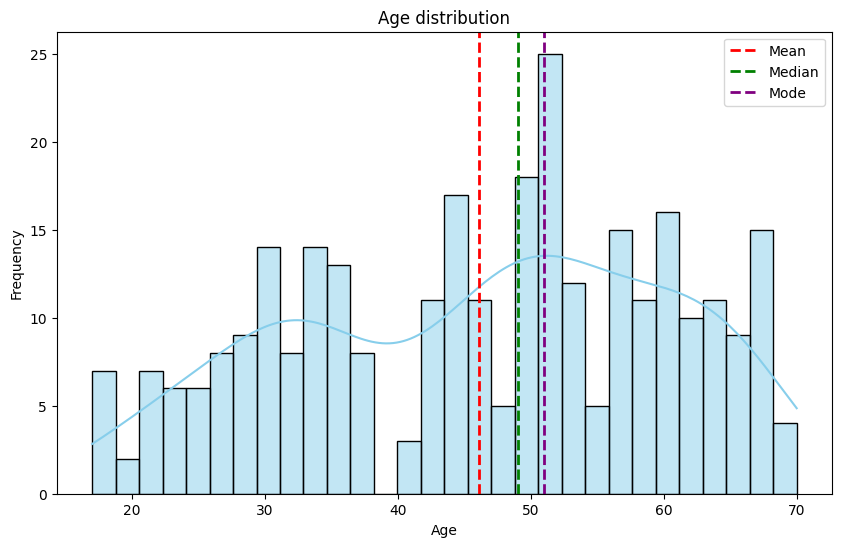

In [13]:
plt.figure(figsize=(10, 6)) 
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')

# add line mean
plt.axvline(df['Age'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')

# add line median
plt.axvline(df['Age'].median(), color='green', linestyle='dashed', linewidth=2, label='Median')

mode_value = df['Age'].mode().values[0]

# add line for mode
plt.axvline(mode_value, color='purple', linestyle='dashed', linewidth=2, label='Mode')

# Add tags and title
plt.xlabel('Age') 
plt.ylabel('Frequency')
plt.title('Age distribution') 


plt.legend()
plt.show()

In [14]:
df['Gender'].value_counts() 

Gender
M    155
F    145
Name: count, dtype: int64

In [15]:
df['Gender'].mode()

0    M
Name: Gender, dtype: object

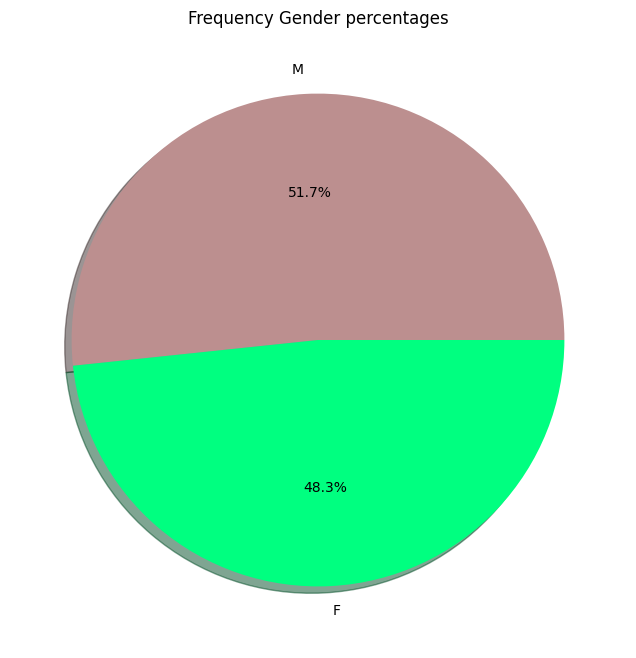

In [19]:
x = df['Gender'].value_counts() 
labels = x.index.tolist() 
plt.figure(figsize=(8, 8)) 
plt.pie(x,                
        labels=labels,    
        autopct='%1.1f%%',
        colors=['rosybrown', '#00ff80'], 
        shadow=True)

plt.title("Frequency Gender percentages")
plt.show()

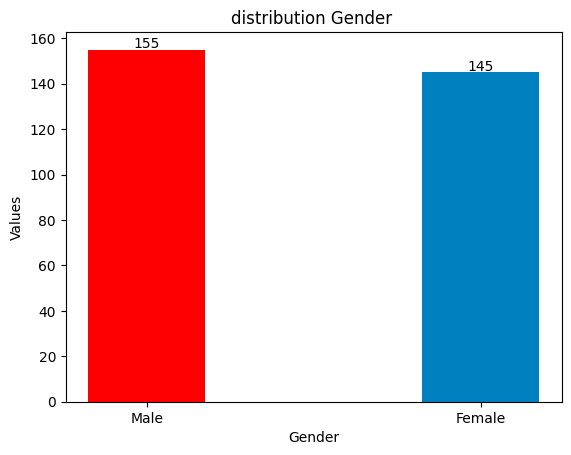

In [20]:
import matplotlib.pyplot as plt

x=df['Gender'].value_counts()
# Your list of values
labels = ['Male', 'Female']

# Create a bar chart
plt.bar(labels, [x.iloc[0], x.iloc[1]], color=['red', '#0080bf'], width=.35)

# Adding Labels and title
plt.xlabel('Gender')
plt.ylabel('Values')
plt.title('distribution Gender ')

# Adding value annotations on top of the bars
for i, value in enumerate(x):
    plt.text(i, value + .90, str(value), ha='center')

# Show the bar chart
plt.show()

In [21]:
df['Website_Activity'].mode()

0    Seldom
Name: Website_Activity, dtype: object

In [22]:
df['Website_Activity'].value_counts()

Website_Activity
Seldom      194
Regular      83
Frequent     23
Name: count, dtype: int64

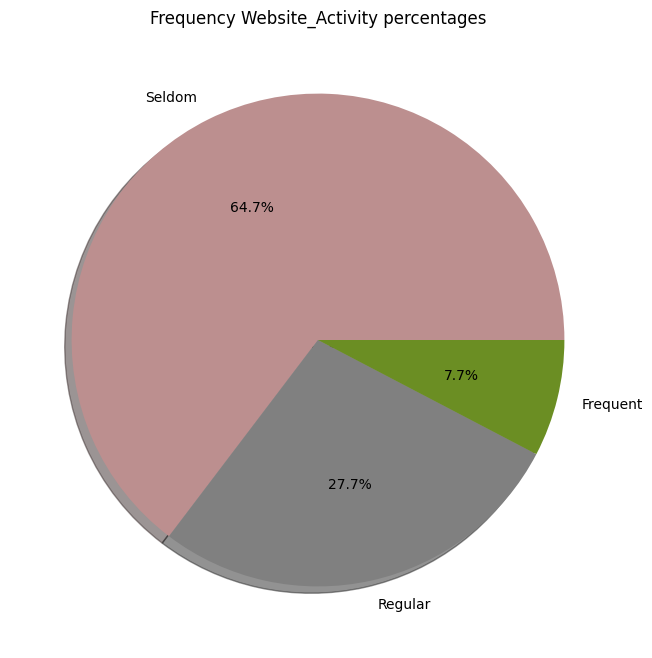

In [24]:
y = df['Website_Activity'].value_counts()
# Dynamically get labels from the Series index if you want them to match the order of counts
label = y.index.tolist()
# Or, if you prefer explicit labels and are sure of their order:
# label = ['Seldom', 'Regular', 'Frequent']

plt.figure(figsize=(8, 8)) # Set figure size for better visualization
plt.pie(y, # Pass the entire Series 'y' as the data for the pie chart
        labels=label,
        autopct='%1.1f%%',
        colors=['rosybrown', 'gray', 'olivedrab'], # Ensure your colors match the number of labels
        shadow=True)

plt.title("Frequency Website_Activity percentages")
plt.show()

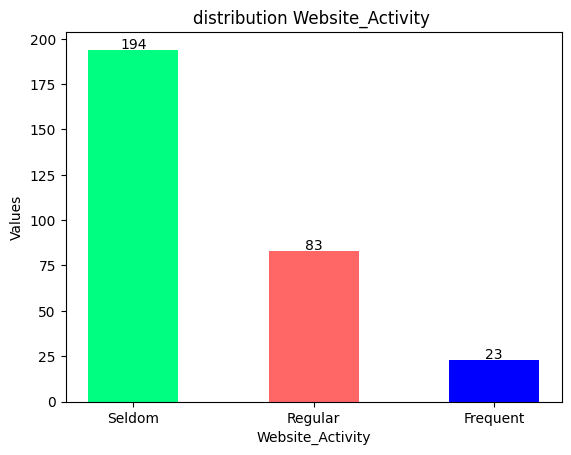

In [25]:
import matplotlib.pyplot as plt

q=df['Website_Activity'].value_counts()
# Your list of values
labels = ['Seldom', 'Regular', 'Frequent']

# Create a bar chart
plt.bar(labels, [q.iloc[0], q.iloc[1], q.iloc[2]], color=['#00ff80', '#ff6666', 'blue'], width=.5)

# Adding Labels and title
plt.xlabel('Website_Activity')
plt.ylabel('Values')
plt.title('distribution Website_Activity ')

# Adding value annotations on top of the bars
for i, value in enumerate(q):
    plt.text(i, value + 0.5, str(value), ha='center')

# Show the bar chart
plt.show()

In [26]:
df['Payment_Method'].value_counts()

Payment_Method
'Website Account'    119
'Bank Transfer'      100
'Monthly Billing'     43
'Credit Card'         38
Name: count, dtype: int64

In [27]:
print(df['Payment_Method'].mode())

0    'Website Account'
Name: Payment_Method, dtype: object


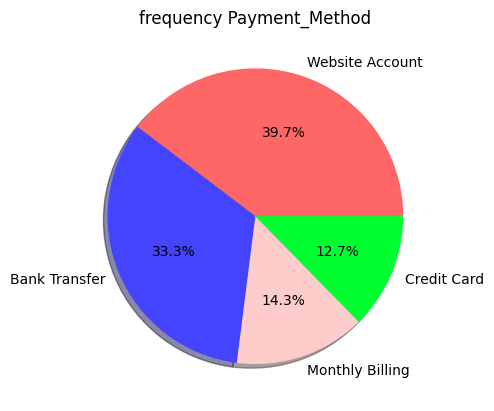

In [28]:
t=df['Payment_Method'].value_counts() # The data in the Payment_Method feature showed
label=['Website Account', 'Bank Transfer', 'Monthly Billing', 'Credit Card'] # Names of parts pie plot
plt.pie([t.iloc[0],t.iloc[1],t.iloc[2],t.iloc[3]], labels=label, autopct='%1.1f%%', \
        colors=['#ff6666', '#4444ff', '#ffcccc', '#00ff30'],shadow=True)
plt.title('frequency Payment_Method') # name of title pie plot
plt.show() # Show graph

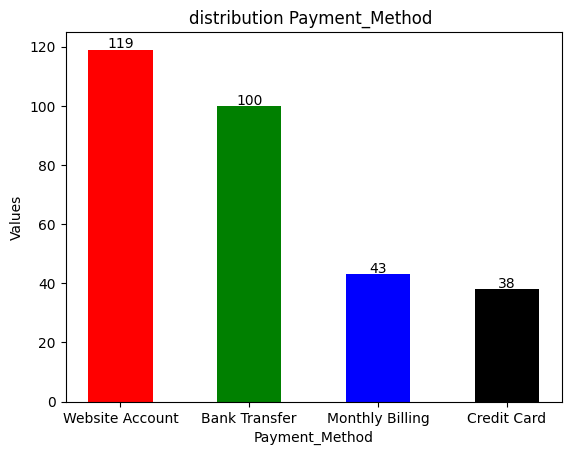

In [29]:
w=df['Payment_Method'].value_counts()
# Your list of values
labels = ['Website Account', 'Bank Transfer', 'Monthly Billing', 'Credit Card']

# Create a bar chart
plt.bar(labels, [w.iloc[0], w.iloc[1], w.iloc[2], w.iloc[3]], color=['red', 'green', 'blue', 'black'], width=.5)

# Adding labels and title
plt.xlabel('Payment_Method')
plt.ylabel('Values')
plt.title('distribution Payment_Method ')

# Adding value annotations on top of the bars
for i, value in enumerate(w):
    plt.text(i, value + 0.5, str(value), ha='center')
    
plt.show()

In [30]:
# Disaply of max in feature Marital_Status
df['Marital_Status'].value_counts()

Marital_Status
S    152
M    148
Name: count, dtype: int64

In [31]:
# Disaply of frequency in feature Marital_Status
df['Marital_Status'].mode() 

0    S
Name: Marital_Status, dtype: object

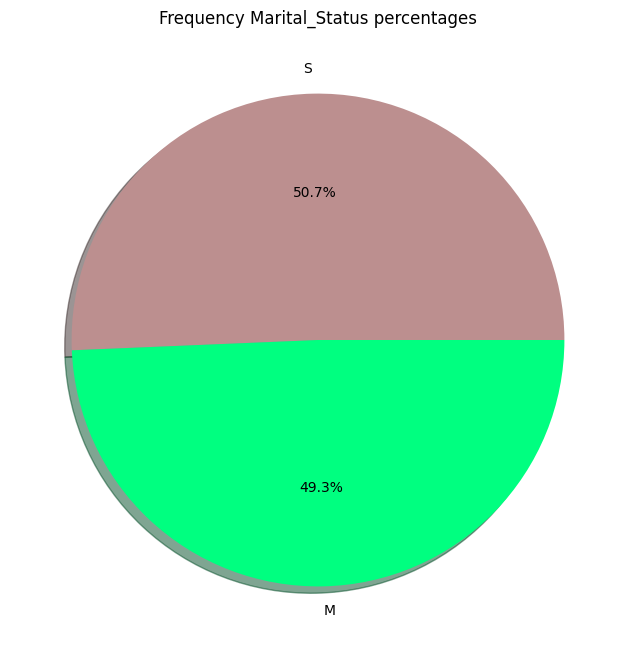

In [33]:
x = df['Marital_Status'].value_counts()
labels = x.index.tolist()
plt.figure(figsize=(8, 8)) 
plt.pie(x,                
        labels=labels,    
        autopct='%1.1f%%',
        colors=['rosybrown', '#00ff80'], 
        shadow=True)

plt.title("Frequency Marital_Status percentages") 
plt.show() 

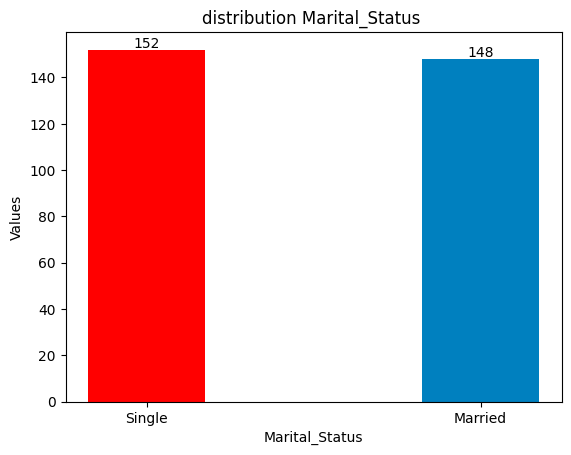

In [34]:
x=df['Marital_Status'].value_counts()
labels = ['Single', 'Married']

plt.bar(labels, [x.iloc[0], x.iloc[1]], color=['red', '#0080bf'], width=.35)

plt.xlabel('Marital_Status')
plt.ylabel('Values')
plt.title('distribution Marital_Status ')

# Adding value annotations on top of the bars
for i, value in enumerate(x):
    plt.text(i, value + .90, str(value), ha='center')

# Show the bar chart
plt.show()

In [35]:
# Disaply of frequency in feature Browsed_Electronics_12Mo
df['Browsed_Electronics_12Mo'].mode()

0    Yes
Name: Browsed_Electronics_12Mo, dtype: object

In [36]:
# Disaply of max in feature Browsed_Electronics_12Mo
df['Browsed_Electronics_12Mo'].value_counts()

Browsed_Electronics_12Mo
Yes    289
No      11
Name: count, dtype: int64

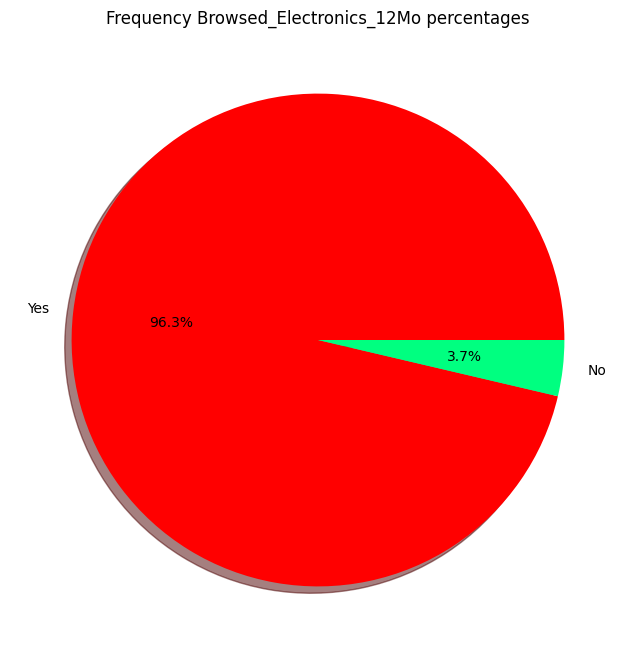

In [38]:
x = df['Browsed_Electronics_12Mo'].value_counts()
labels = x.index.tolist() 
plt.figure(figsize=(8, 8)) 
plt.pie(x,                
        labels=labels,    
        autopct='%1.1f%%',
        colors=['red', '#00ff80'], 
        shadow=True)

plt.title("Frequency Browsed_Electronics_12Mo percentages") 
plt.show() 

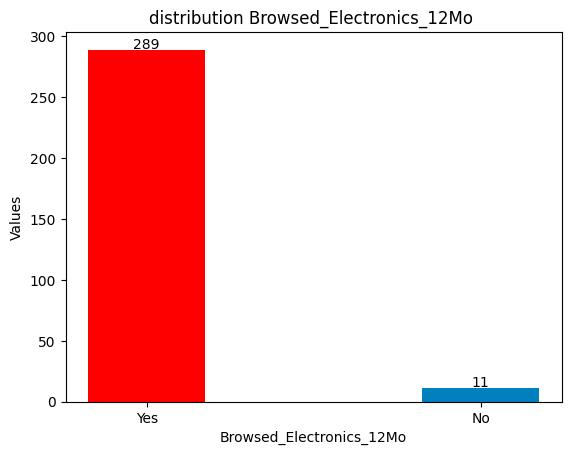

In [39]:
import matplotlib.pyplot as plt
x=df['Browsed_Electronics_12Mo'].value_counts()
labels = ['Yes', 'No']

plt.bar(labels, [x.iloc[0], x.iloc[1]], color=['red', '#0080bf'], width=.35)
plt.xlabel('Browsed_Electronics_12Mo')
plt.ylabel('Values')
plt.title('distribution Browsed_Electronics_12Mo ')

for i, value in enumerate(x):
    plt.text(i, value + .90, str(value), ha='center')

plt.show()

In [40]:
# Disaply of frequency in feature Bought_Electronics_12Mo
df['Bought_Electronics_12Mo'].value_counts()

Bought_Electronics_12Mo
No     172
Yes    128
Name: count, dtype: int64

In [41]:
#Disaply frequency in feature Bought_Electronics
df['Bought_Electronics_12Mo'].mode() 

0    No
Name: Bought_Electronics_12Mo, dtype: object

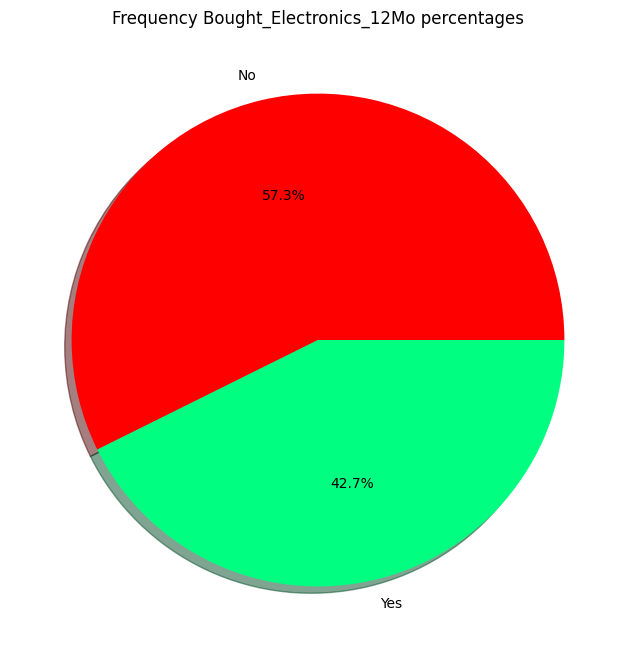

In [43]:
x = df['Bought_Electronics_12Mo'].value_counts()
label = x.index.tolist()

plt.figure(figsize=(8, 8)) 
plt.pie(x,                
        labels=label,     
        autopct='%1.1f%%',
        colors=['red', '#00ff80'], 
        shadow=True)

plt.title("Frequency Bought_Electronics_12Mo percentages") 
plt.show() 

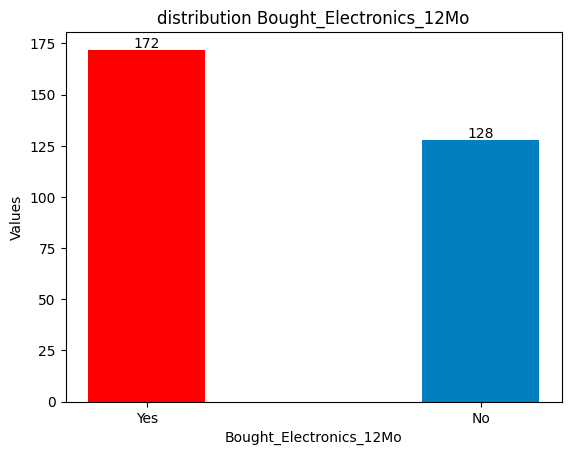

In [44]:
x = df['Bought_Electronics_12Mo'].value_counts()
labels = ['Yes', 'No']

plt.bar(labels, [x.iloc[0], x.iloc[1]], color=['red', '#0080bf'], width=.35)
plt.xlabel('Bought_Electronics_12Mo')
plt.ylabel('Values')
plt.title('distribution Bought_Electronics_12Mo')

for i, value in enumerate(x):
    plt.text(i, value + .90, str(value), ha='center')

plt.show()

In [45]:
# Dispalay of frequency in feature Bought_Digital_Books
df['Bought_Digital_Books'].value_counts()

Bought_Digital_Books
No     173
Yes    127
Name: count, dtype: int64

In [46]:
# Dispalay frequency in feature Bought_Digital_Books
df['Bought_Digital_Books'].mode()

0    No
Name: Bought_Digital_Books, dtype: object

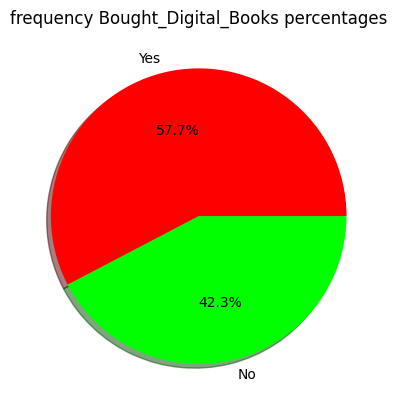

In [47]:
x = df['Bought_Digital_Books'].value_counts() 
labels=['Yes', 'No'] 

plt.pie(x=[df['Bought_Digital_Books'].value_counts().iloc[0], df['Bought_Digital_Books'].value_counts().iloc[1]], 
        labels=labels, 
        autopct='%1.1f%%', 
        colors=['red', '#00ff00'], 
        shadow=True)

plt.title("frequency Bought_Digital_Books percentages")
plt.show() 

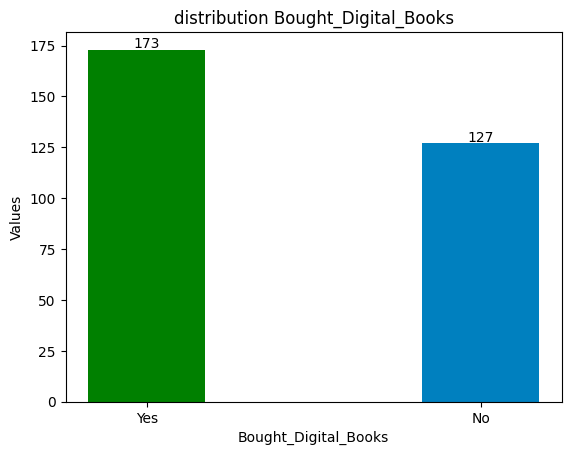

In [48]:
x = df['Bought_Digital_Books'].value_counts()
labels = ['Yes', 'No']

plt.bar(labels, [x.iloc[0], x.iloc[1]], color=['green', '#0080bf'], width=.35)

plt.xlabel('Bought_Digital_Books')
plt.ylabel('Values')
plt.title('distribution Bought_Digital_Books')

for i, value in enumerate(x):
    plt.text(i, value + .90, str(value), ha='center')

plt.show()

In [49]:
# calculate the lower and upper limits of outliers
Q1 = df['Age'].quantile(.25)
Q3 = df['Age'].quantile(.75)
IQR = Q3 - Q1

LOWER_BOUND = (Q1 - 1.5 * IQR)
UPPER_BOUND = (Q3 + 1.5 * IQR)

outlier_list = df[((df['Age'] < LOWER_BOUND) | (df['Age'] > UPPER_BOUND))]['Age'].tolist()

print("\033[94m" + str(outlier_list) + "\033[0m")

[]


C:\Users\Rama Al Jada\AppData\Local\Temp\ipykernel_41732\2949947489.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Age'], palette='husl')


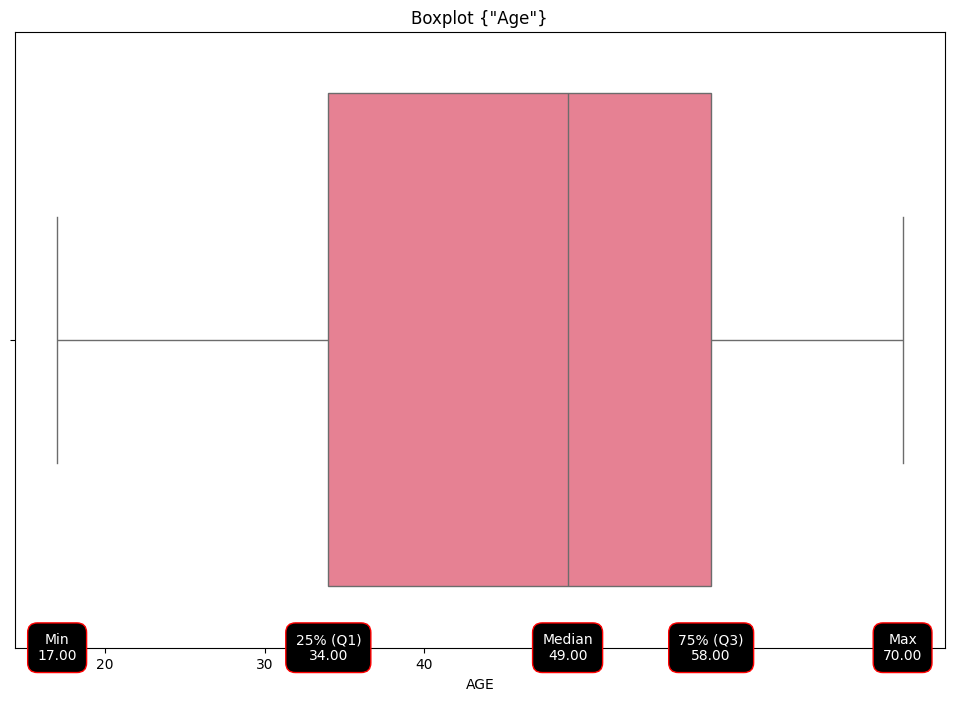

In [50]:
# Create a boxplot using seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['Age'], palette='husl')

# Set up labels and title
plt.xlabel('AGE')
plt.title('Boxplot {"Age"}') 
                             
# Extract statistical information
stats_info = df['Age'].describe()

# Show statistical information inside the boxplot
for stat, value in zip(['25% (Q1)', 'Median', '75% (Q3)', 'Max', 'Min'], 
                       [stats_info['25%'], stats_info['50%'], stats_info['75%'], stats_info['max'], stats_info['min']]):
    plt.annotate(f'{stat}\n{value:.2f}', xy=(value, 0.5), color='white', ha='center', va='center',
                 bbox=dict(facecolor='black', edgecolor='red', boxstyle='round,pad=0.7'))
    
# Show graph
plt.show()

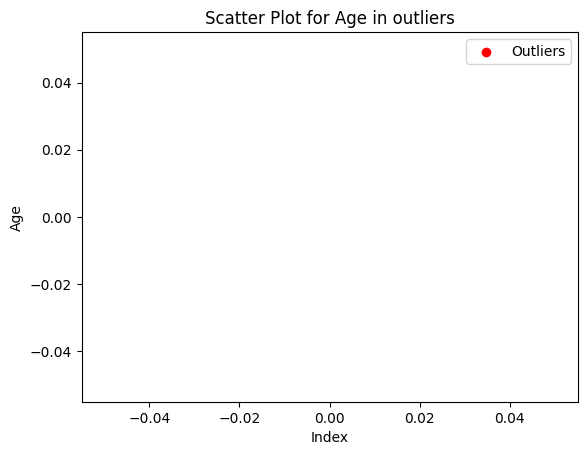

In [51]:
plt.scatter(x=(range(len(outlier_list))), y=outlier_list, color='red', label='Outliers')
plt.xlabel('Index') 
plt.ylabel('Age') 
plt.title('Scatter Plot for Age in outliers') 
plt.legend()
plt.show()

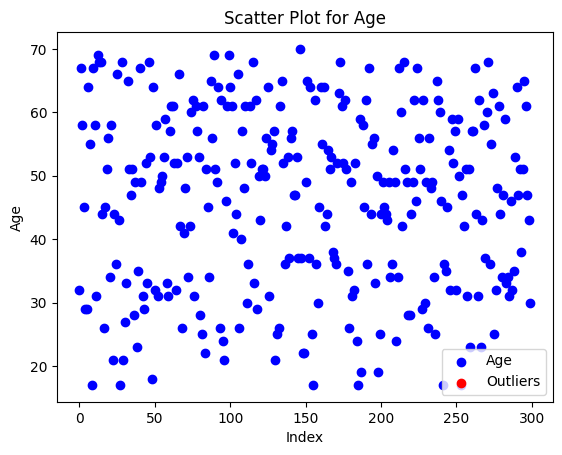

In [52]:
age_list = df['Age'].tolist()

plt.scatter(x=(range(len(age_list))), y=df['Age'], color='blue', label='Age')
plt.scatter(x=(range(len(outlier_list))), y=outlier_list, color='red', label='Outliers')
plt.xlabel('Index') 
plt.ylabel('Age') 
plt.title('Scatter Plot for Age') 
plt.legend()
plt.show()

In [53]:
df.head(1)

,User_ID,Gender,Age,Marital_Status,Website_Activity,Browsed_Electronics_12Mo,Bought_Electronics_12Mo,Bought_Digital_Media_18Mo,Bought_Digital_Books,Payment_Method
0,81945,F,32,M,Frequent,Yes,Yes,No,No,'Monthly Billing'


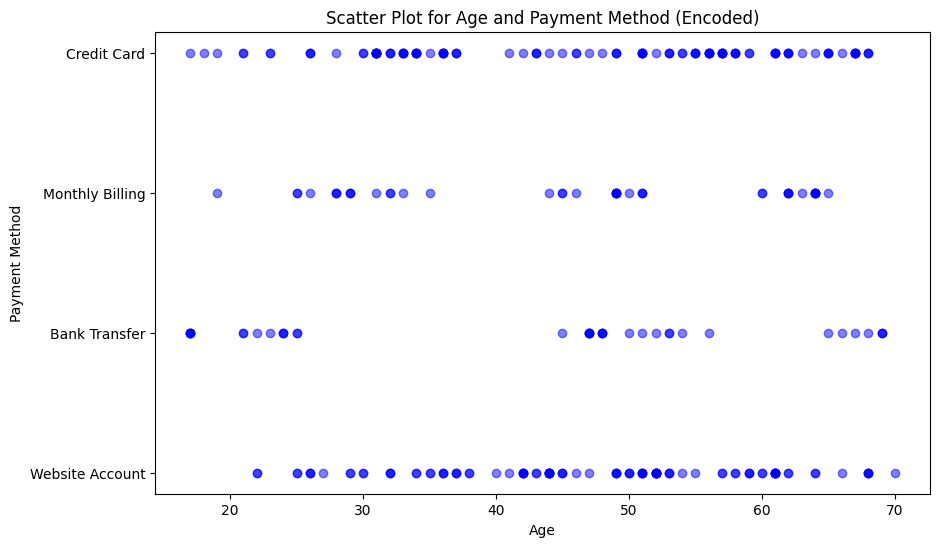

In [54]:
# Assuming df is your DataFrame
label_encoder = LabelEncoder()
df['Payment_Method_Encoded'] = label_encoder.fit_transform(df['Payment_Method'])

# Define the custom labels
payment_method_labels = ['Website Account', 'Bank Transfer', 'Monthly Billing', 'Credit Card']

plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Payment_Method_Encoded'], color='blue', alpha=0.5)
plt.title('Scatter Plot for Age and Payment Method (Encoded)')
plt.xlabel('Age')
plt.yticks(range(len(payment_method_labels)), payment_method_labels)  # Set custom labels for y-axis ticks
plt.ylabel('Payment Method')
plt.show()

In [56]:
# MIN-MAX NORMALIZATION 

min_age = df['Age'].min()  # Definition of minimum value
max_age = df['Age'].max()  # Definition of maximum value

# Now we will apply the rule:
df['Age_MinMax_Norm'] = (df['Age'] - min_age) / (max_age - min_age)

print(df['Age_MinMax_Norm'].max())
print(df['Age_MinMax_Norm'].min())


df[['Age', 'Age_MinMax_Norm']].head()  # Show Comparison

1.0
0.0


,Age,Age_MinMax_Norm
0,32,0.283019
1,67,0.943396
2,58,0.773585
3,45,0.528302
4,29,0.226415


In [59]:
# Z-SCORE NORMALIZATION
mean_age = df['Age'].mean()  # Calculate the mean for the Age attribute
std_age = df['Age'].std()    # Calculate the std for the Age attribute

# Now we will apply the rule:
df['Age_Zscore_Norm'] = (df['Age'] - mean_age) / std_age

df[['Age', 'Age_Zscore_Norm']].head()  # Show Comparison

,Age,Age_Zscore_Norm
0,32,-0.997062
1,67,1.477915
2,58,0.841492
3,45,-0.077785
4,29,-1.209203


In [60]:
print(df['Age_Zscore_Norm'].min())
print(df['Age_Zscore_Norm'].max())

-2.0577667620897016
1.6900558630221258


In [61]:
# Define the age categories
age_bins = [1, 17, 36, 56, 71, float('inf')]  # float('inf') => Positive infinity
age_labels = ['Teenager', 'Young', 'Mid_Age', 'Mature', 'Old']

In [62]:
# Discretize the "Age" attribute
df['Age_Category'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# (right=False) => This parameter indicates that
# the intervals should be left-closed
# (inclusive on the Left) and right-open (exclusive on the right).

In [63]:
# Display the frequency of each category
age_category_counts = df['Age_Category'].value_counts()
print(age_category_counts)

Age_Category
Mid_Age     124
Mature       91
Young        85
Teenager      0
Old           0
Name: count, dtype: int64


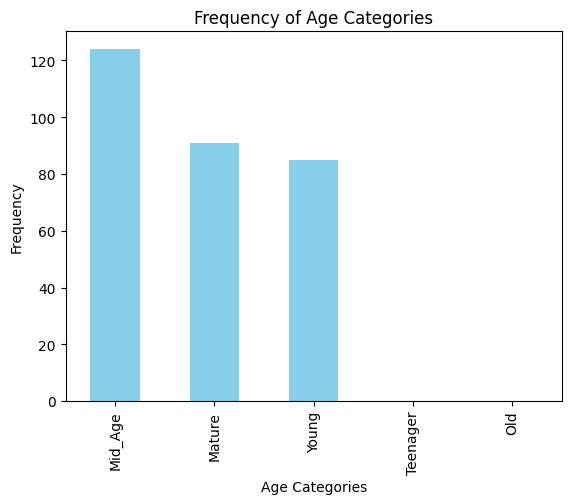

<class 'pandas.core.series.Series'>


In [64]:
category_counts = df['Age_Category'].value_counts()  
category_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Age Categories')
plt.xlabel('Age Categories')
plt.ylabel('Frequency')
plt.show()

print(type(category_counts))

In [65]:
# Show Comparison
df[['Age', 'Age_Category']].head()  

,Age,Age_Category
0,32,Young
1,67,Mature
2,58,Mature
3,45,Mid_Age
4,29,Young


In [66]:
df.head()

,User_ID,Gender,Age,Marital_Status,Website_Activity,Browsed_Electronics_12Mo,Bought_Electronics_12Mo,Bought_Digital_Media_18Mo,Bought_Digital_Books,Payment_Method,Payment_Method_Encoded,Age_MinMax_Norm,Age_Zscore_Norm,Age_Category
0,81945,F,32,M,Frequent,Yes,Yes,No,No,'Monthly Billing',2,0.283019,-0.997062,Young
1,29995,M,67,S,Regular,Yes,No,No,Yes,'Credit Card',1,0.943396,1.477915,Mature
2,89831,F,58,S,Seldom,Yes,No,Yes,No,'Website Account',3,0.773585,0.841492,Mature
3,19419,F,45,S,Seldom,Yes,No,Yes,No,'Monthly Billing',2,0.528302,-0.077785,Mid_Age
4,90254,F,29,M,Seldom,Yes,Yes,Yes,No,'Bank Transfer',0,0.226415,-1.209203,Young


In [67]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head()

,User_ID,Gender,Age,Marital_Status,Website_Activity,Browsed_Electronics_12Mo,Bought_Electronics_12Mo,Bought_Digital_Media_18Mo,Bought_Digital_Books,Payment_Method,Payment_Method_Encoded,Age_MinMax_Norm,Age_Zscore_Norm,Age_Category
0,81945,0,32,M,Frequent,Yes,Yes,No,No,'Monthly Billing',2,0.283019,-0.997062,Young
1,29995,1,67,S,Regular,Yes,No,No,Yes,'Credit Card',1,0.943396,1.477915,Mature
2,89831,0,58,S,Seldom,Yes,No,Yes,No,'Website Account',3,0.773585,0.841492,Mature
3,19419,0,45,S,Seldom,Yes,No,Yes,No,'Monthly Billing',2,0.528302,-0.077785,Mid_Age
4,90254,0,29,M,Seldom,Yes,Yes,Yes,No,'Bank Transfer',0,0.226415,-1.209203,Young
